In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import statsmodels.api as sm

In [2]:
from statsmodels.tsa.stattools import acovf, acf,pacf,pacf_yw,pacf_ols

In [3]:
pwd


'C:\\Users\\DELL\\Desktop\\Placement\\Udemy\\UDEMY_TSA_FINAL\\06-General-Forecasting-Models'

In [4]:
df1 = pd.read_csv('airline_passengers.csv',index_col = 'Month', parse_dates=True)
df1.index.freq='MS'

In [5]:
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col = 'Date', parse_dates=True)
df2.index.freq='D'

In [6]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
# Codes to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [9]:
df =pd.DataFrame({'a':[13,5,11,12,9]})

In [10]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [11]:
#acf in one D
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [12]:
pacf_yw(df['a'],nlags = 4, method='mle')

# mle(maximum likelihood estimation) is used to use the biased acf coefficients 
# nlab is 5-1 = 4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [13]:
# For unbiased
pacf_yw(df['a'],nlags = 4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [14]:
pacf_ols(df['a'],nlags=4)

# ols stands for ordinary least squares estimates for each leg instead of the usual Walker equations.

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [15]:
from pandas.plotting import lag_plot

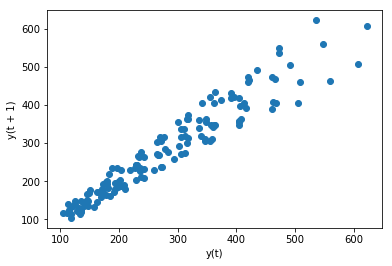

In [16]:
lag_plot(df1['Thousands of Passengers'])

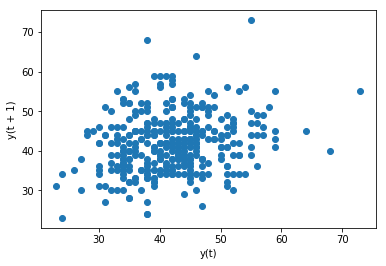

In [17]:
lag_plot(df2['Births'])

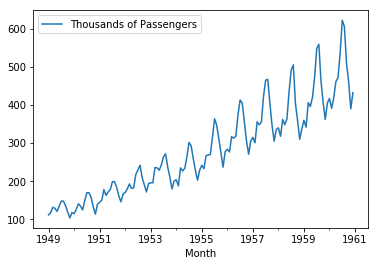

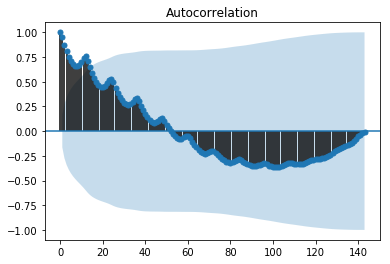

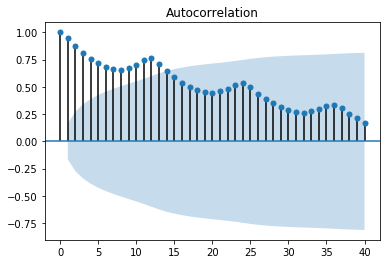

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
df1.plot()
plot_acf(df1); #This will give 144 lags
plot_acf(df1,lags=40);

- We see above that autocorrelation tends to increase on yearly basis, which is expected

- Whats the shaded region though??:
- By default this is a 95% confidence interval
- Basically its suggesting that correlation values outside of this confidence interval are very likely to be a correlation  
- Shaded region gets larger and larger as our lags get larger and larger as well, which makes sense as we are going to be more sure of the smaller lag steps for the autocorrelation than the larger steps

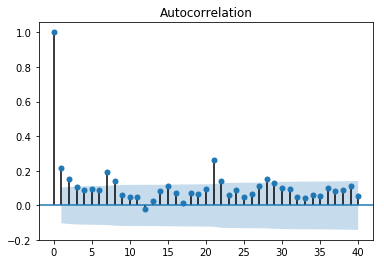

In [23]:
plot_acf(df2, lags=40);

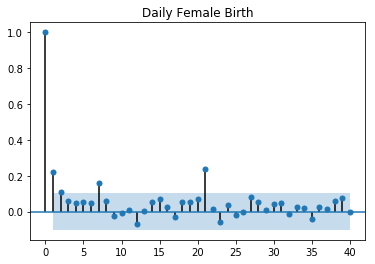

In [25]:
plot_pacf(df2,lags=40,title='Daily Female Birth');